In [1]:
from datetime import date, datetime, timedelta
import pandas as pd
import numpy as np
import glob
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import datetime
# sys.path.insert(0, "../tools")
from covid19model.data.mobility import * # contains all necessary functions
from covid19model.visualization.output import *
from covid19model.data.sciensano import get_sciensano_COVID19_data_spatial, get_sciensano_COVID19_data
from covid19model.data.mobility import get_google_mobility_data

# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [3]:
# df_hosp, df_mort, df_cases, df_vacc = get_sciensano_COVID19_data(update=False)
df_hosp

H_tot  ICU_tot  H_in  H_out
date       NIS                               
2020-03-15 10000     50        9     7      4
           20001     13        2     2      0
           20002      5        2     1      0
           21000     58       11     7      2
           30000     19        3     6      2
...                 ...      ...   ...    ...
2022-01-31 50000    630       53    44     29
           60000    500       45    54     37
           70000    223       24    22     10
           80000     58       12     5      1
           90000    193       19     9      4

[7568 rows x 4 columns]

In [29]:
# Import Sciensano data
sciensano_df = get_sciensano_COVID19_data_spatial(agg='arr', values='hospitalised_IN', moving_avg=True).sum(axis=1)
sciensano_values= sciensano_df.values
sciensano_dates = sciensano_df.index

# Google Mobility Data per activity

**Insert Google Mobility parameters per province**

In [30]:
NIS = 60000

# google_df = get_google_mobility_data(update=False, provincial=True)
# google_df_dates = google_df.index.values
# google_df.columns

google_df = google_df.reset_index().set_index('date')
google_df = google_df[google_df['NIS']==NIS].drop(columns=['NIS', 'parks', 'residential'])

google_df['g_home'] = 1
google_df['g_school'] = 0
google_df['g_work'] = 1 + google_df.work/100
google_df['g_transport'] = 1 + google_df.transport/100
google_df['g_leisure'] = 1 + google_df.retail_recreation/100
google_df['g_other'] = 1 + google_df.grocery/100

google_df = google_df.drop(columns=['work', 'transport', 'retail_recreation', 'grocery'])

# google_df.plot()

**Insert Google Mobility parameters nationally**

In [16]:
google_df = get_google_mobility_data(update=False, provincial=False)
google_df = google_df.drop(columns=['parks', 'residential'])

google_df['g_home'] = 1
google_df['g_school'] = 0
google_df['g_work'] = 1 + google_df.work/100
google_df['g_transport'] = 1 + google_df.transport/100
google_df['g_leisure'] = 1 + google_df.retail_recreation/100
google_df['g_other'] = 1 + google_df.grocery/100

google_df = google_df.drop(columns=['work', 'transport', 'retail_recreation', 'grocery'])

google_df

,g_home,g_school,g_work,g_transport,g_leisure,g_other
date,,,,,,
2020-02-15,1,0,1.01,1.09,1.03,1.02
2020-02-16,1,0,0.97,0.97,0.93,0.97
2020-02-17,1,0,1.04,1.04,1.01,1.02
2020-02-18,1,0,1.04,1.06,1.03,1.03
2020-02-19,1,0,1.04,1.05,1.03,1.01
...,...,...,...,...,...,...
2022-01-24,1,0,0.74,0.72,0.92,1.16
2022-01-25,1,0,0.73,0.69,0.88,1.15
2022-01-26,1,0,0.74,0.69,0.88,1.11


In [17]:
google_df.loc[google_df.index>=pd.Timestamp(2020, 2, 15),'g_school'] = 1 # t0-t1
google_df.loc[google_df.index>=pd.Timestamp(2020, 3, 15),'g_school'] = 0 # t1-t2
google_df.loc[google_df.index>=pd.Timestamp(2020, 5, 15),'g_school'] = 1 # t2-t3
google_df.loc[google_df.index>=pd.Timestamp(2020, 7, 1), 'g_school'] = 0 # t3-t4
google_df.loc[google_df.index>=pd.Timestamp(2020, 8, 3), 'g_school'] = 0 # t4-t5
google_df.loc[google_df.index>=pd.Timestamp(2020, 8, 24),'g_school'] = 0 # t5-t6
google_df.loc[google_df.index>=pd.Timestamp(2020, 9, 1), 'g_school'] = 0.7 # t6-t7
google_df.loc[google_df.index>=pd.Timestamp(2020, 9, 21),'g_school'] = 1 # t7-t8
google_df.loc[google_df.index>=pd.Timestamp(2020, 10,19),'g_school'] = 1 # t8-t9
google_df.loc[google_df.index>=pd.Timestamp(2020, 11, 2),'g_school'] = 0 # t9-t10
google_df.loc[google_df.index>=pd.Timestamp(2020, 11,16),'g_school'] = 1 # t10-t11
google_df.loc[google_df.index>=pd.Timestamp(2020, 12,18),'g_school'] = 0 # t11-t12
google_df.loc[google_df.index>=pd.Timestamp(2021, 1, 4), 'g_school'] = 1 # t12-t13
google_df.loc[google_df.index>=pd.Timestamp(2021, 2, 15),'g_school'] = 0 # t13-t14
google_df.loc[google_df.index>=pd.Timestamp(2021, 2, 21),'g_school'] = 1 # t14-t15
google_df.loc[google_df.index>=pd.Timestamp(2021, 2, 28),'g_school'] = 1 # t15-t16
google_df.loc[google_df.index>=pd.Timestamp(2021, 3, 26),'g_school'] = 0 # t16-t17
google_df.loc[google_df.index>=pd.Timestamp(2021, 4, 18),'g_school'] = 1 # t17-t18
google_df.loc[google_df.index>=pd.Timestamp(2021, 6, 1), 'g_school'] = 1 # t18-t19
google_df.loc[google_df.index>=pd.Timestamp(2021, 7, 1), 'g_school'] = 0 # t19-t20
google_df.loc[google_df.index>=pd.Timestamp(2021, 9, 1), 'g_school'] = 0.7 # t20-t21
google_df.loc[google_df.index>=pd.Timestamp(2021, 9, 21),'g_school'] = 1 # t21-t22
google_df.loc[google_df.index>=pd.Timestamp(2021, 10, 1),'g_school'] = 1 # t22-t23
google_df.loc[google_df.index>=pd.Timestamp(2021, 11, 1),'g_school'] = 0 # t23-t24
google_df.loc[google_df.index>=pd.Timestamp(2021, 11, 7),'g_school'] = 1 # t24-t25
google_df.loc[google_df.index>=pd.Timestamp(2021, 12,21),'g_school'] = 0 # t25-t26

<IPython.core.display.Javascript object>


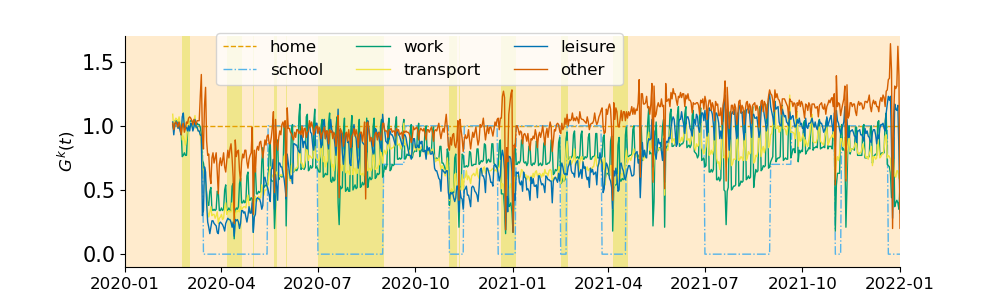

In [20]:
from covid19model.visualization.utils import moving_avg
from covid19model.visualization.output import *
from covid19model.data import sciensano

start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,3))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.7
ax.set_ylim(-0.1, ylim)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

ax.plot(google_df.index, google_df.values[:,0:1], linewidth=1, linestyle='--')
ax.plot(google_df.index, google_df.values[:,1:2], linewidth=1, linestyle='-.')
ax.plot(google_df.index, google_df.values[:,2:], linewidth=1, linestyle='-')#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
# google_df.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$G^{k}(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

ax.legend(['home', 'school', 'work', 'transport', 'leisure', 'other'], loc='center', ncol=3,  bbox_to_anchor=(0.38, 0.9), fontsize=ticklabelsize)
# plt.savefig("GCM_resulting_timeseries.png", bbox_inches='tight', dpi=400)

# Effectivity parameters time series

Taken from `policies_all` tdpf used in the latest calibration.

NOTE: all these values are fixed for dates in the past and calibrated over the _entire_ past.

In [29]:
# Use the Google dataframe with new columns
google_df_bis = get_google_mobility_data(update=False, provincial=False)
google_df_bis = google_df_bis.drop(columns=['parks', 'residential'])

google_df_bis['omega_home'] = 0
google_df_bis['omega_school'] = 0
google_df_bis['omega_work'] = 0
google_df_bis['omega_rest'] = 0

google_df_bis.drop(columns=['retail_recreation', 'grocery', 'transport', 'work'], inplace=True)

In [36]:
# All key dates copied from tdpf

t0 = pd.Timestamp('2020-02-15') # first Google date

# Define key dates of first wave
t1 = pd.Timestamp('2020-03-15') # start of lockdown
t2 = pd.Timestamp('2020-05-15') # gradual re-opening of schools (assume 50% of nominal scenario)
t3 = pd.Timestamp('2020-07-01') # start of summer holidays
t4 = pd.Timestamp('2020-08-03') # Summer lockdown in Antwerp
t5 = pd.Timestamp('2020-08-24') # End of summer lockdown in Antwerp
t6 = pd.Timestamp('2020-09-01') # end of summer holidays
t7 = pd.Timestamp('2020-09-21') # Opening universities

# Define key dates of winter 2020-2021
t8 = pd.Timestamp('2020-10-19') # lockdown (1)
t9 = pd.Timestamp('2020-11-02') # lockdown (2)
t10 = pd.Timestamp('2020-11-16') # schools re-open
t11 = pd.Timestamp('2020-12-18') # Christmas holiday starts
t12 = pd.Timestamp('2021-01-04') # Christmas holiday ends
t13 = pd.Timestamp('2021-02-15') # Spring break starts
t14 = pd.Timestamp('2021-02-21') # Spring break ends
t15 = pd.Timestamp('2021-02-28') # Contact increase in children
t16 = pd.Timestamp('2021-03-26') # Start of Easter holiday
t17 = pd.Timestamp('2021-04-18') # End of Easter holiday
t18 = pd.Timestamp('2021-06-01') # Start of lockdown relaxation
t19 = pd.Timestamp('2021-07-01') # Start of Summer holiday

# Define key dates of winter 2021-2022
t20 = pd.Timestamp('2021-09-01') # End of Summer holiday
t21 = pd.Timestamp('2021-09-21') # Opening of universities
t22 = pd.Timestamp('2021-10-01') # Flanders releases all measures
t23 = pd.Timestamp('2021-11-01') # Start of autumn break
t24 = pd.Timestamp('2021-11-07') # End of autumn break
t25 = pd.Timestamp('2021-11-17') # Overlegcommite 1 out of 3
t26 = pd.Timestamp('2021-12-03') # Overlegcommite 3 out of 3
t27 = pd.Timestamp('2021-12-20') # Start of Christmass break (one week earlier than normal)

t28 = pd.Timestamp('2021-12-25') # Christmas
t29 = pd.Timestamp('2021-12-31') # NYE

t30 = pd.Timestamp('2022-01-10') # End of Christmass break

# all_dates = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17, t18, t19, t20, t21, t22, t23, t24, t25, t26])

In [37]:
# calibration values
prev_home_cal = 0.446
prev_home_cal = 0.046
prev_home_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_home'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_home'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_home'] = 1

In [38]:
# calibration values
prev_school_cal = 0.446
prev_school_cal = 0.046
prev_school_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_school'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_school'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_school'] = 1

In [39]:
# calibration values
prev_work_cal = 0.446
prev_work_cal = 0.046
prev_work_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_work'] = 0
google_df_bis.loc[google_df.index>=t9, 'omega_work'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_work'] = 0
google_df_bis.loc[google_df.index>=t12,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_work'] = 0
google_df_bis.loc[google_df.index>=t15,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_work'] = 0
google_df_bis.loc[google_df.index>=t19,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_work'] = 0
google_df_bis.loc[google_df.index>=t23,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_work'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_work'] = 1

In [40]:
# calibration values
prev_rest_cal = 0.446
prev_rest_cal = 0.046
prev_rest_cal = 0.051

google_df_bis.loc[google_df.index>=t0, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t1, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t2, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t3, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t4, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t5, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t6, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t7, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t8, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t9, 'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t10,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t11,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t12,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t13,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t14,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t15,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t16,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t17,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t18,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t19,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t20,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t21,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t22,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t23,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t24,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t25,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t26,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t27,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t28,'omega_rest'] = 1
google_df_bis.loc[google_df.index>=t29,'omega_rest'] = 1

<IPython.core.display.Javascript object>


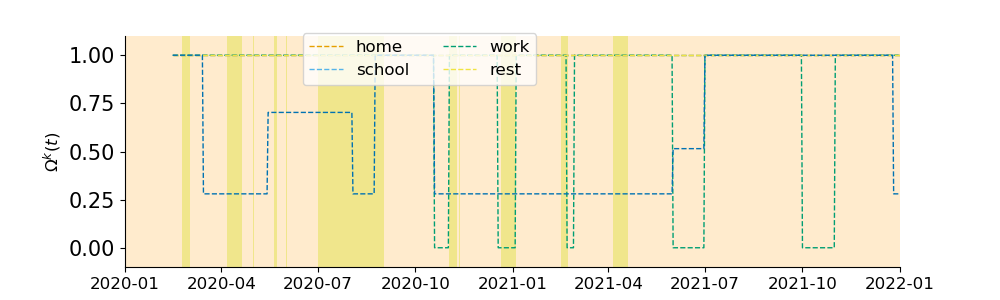

In [41]:
from covid19model.visualization.utils import moving_avg
from covid19model.visualization.output import *
from covid19model.data import sciensano

start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,3))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.1
ax.set_ylim(-0.1, ylim)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

ax.plot(google_df_bis.index, google_df_bis.values, linewidth=1, linestyle='--')
# google_df.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$\Omega^{k}(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

ax.legend(['home', 'school', 'work', 'rest'], loc='center', ncol=2,  bbox_to_anchor=(0.38, 0.9), fontsize=ticklabelsize)
# plt.savefig("GCM_resulting_timeseries.png", bbox_inches='tight', dpi=400)

# Mentality
Note: it would be nice to add the ram

In [55]:
# Use the Google dataframe with new columns
google_df_ment = get_google_mobility_data(update=False, provincial=False)
google_df_ment = google_df_ment.drop(columns=['parks', 'residential'])

google_df_ment['mentality'] = 0

google_df_ment.drop(columns=['retail_recreation', 'grocery', 'transport', 'work'], inplace=True)

In [47]:
# calibration values
mentality_cal = 0.28 # estimate
mentality_cal_min = 0.25 # estimate
mentality_cal_max = 0.35 # estimate

google_df_ment.loc[google_df.index>=t0, 'mentality'] = 1
google_df_ment.loc[google_df.index>=t1, 'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t2, 'mentality'] = mentality_cal + 0.5875*(1-mentality_cal)
google_df_ment.loc[google_df.index>=t3, 'mentality'] = mentality_cal + 0.5875*(1-mentality_cal)
google_df_ment.loc[google_df.index>=t4, 'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t5, 'mentality'] = 1
google_df_ment.loc[google_df.index>=t6, 'mentality'] = 1
google_df_ment.loc[google_df.index>=t7, 'mentality'] = 1
google_df_ment.loc[google_df.index>=t8, 'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t9, 'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t10,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t11,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t12,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t13,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t14,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t15,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t16,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t17,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t18,'mentality'] = mentality_cal + 0.3261*(1-mentality_cal)
google_df_ment.loc[google_df.index>=t19,'mentality'] = 1
google_df_ment.loc[google_df.index>=t20,'mentality'] = 1
google_df_ment.loc[google_df.index>=t21,'mentality'] = 1
google_df_ment.loc[google_df.index>=t22,'mentality'] = 1
google_df_ment.loc[google_df.index>=t23,'mentality'] = 1
google_df_ment.loc[google_df.index>=t24,'mentality'] = 1
google_df_ment.loc[google_df.index>=t25,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t26,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t27,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t28,'mentality'] = mentality_cal
google_df_ment.loc[google_df.index>=t29,'mentality'] = mentality_cal

In [54]:
google_df_ment.drop(index='2020-02-16', inplace=True)
google_df_ment

,mentality
date,
2020-02-15,1.00
2020-02-17,1.00
2020-02-18,1.00
2020-02-19,1.00
2020-02-20,1.00
...,...
2022-01-24,0.28
2022-01-25,0.28
2022-01-26,0.28


<IPython.core.display.Javascript object>


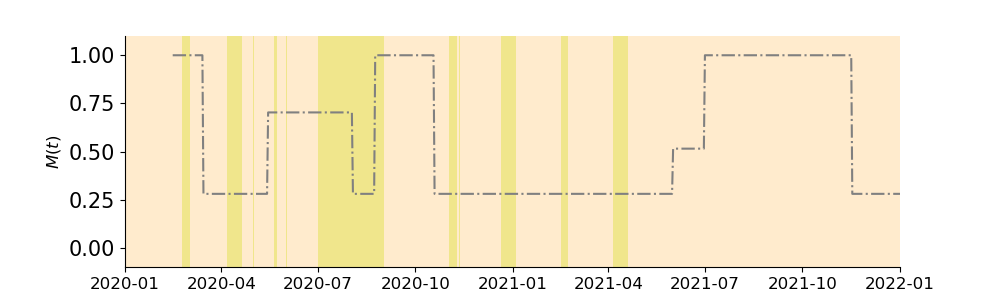

In [52]:
from covid19model.visualization.utils import moving_avg
from covid19model.visualization.output import *
from covid19model.data import sciensano

start_date = datetime.datetime(2020, 1, 1, 0, 0)
end_date = datetime.datetime(2022, 1, 1, 0, 0)

fig, ax = plt.subplots(figsize=(10,3))
ticklabelsize = 12
ax.grid(False)
ax.set_xlim(start_date, end_date)
ylim=1.1
ax.set_ylim(-0.1, ylim)

week_color='blanchedalmond'#'white'
weekend_color='blanchedalmond'#'lightgrey'
vacation_color='khaki'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)

# ax.set_title('test', size=14)

ax.plot(google_df_ment.index, google_df_ment.values, linewidth=1.5, linestyle='-.', color='gray')
# google_df_ment.plot(ax=ax, legend=False, linewidth=1.5)#, color=['k', 'blue', 'k', 'blue', 'k', 'blue'])
ax.set_xlabel(None, size=ticklabelsize)
ax.set_ylabel('$M(t)$', size=ticklabelsize)
plt.xticks(rotation=0, size=ticklabelsize)

ax.set_xlim(start_date, end_date)

ax.grid(False)

# plt.savefig("mentality_timeseries.png", bbox_inches='tight', dpi=400)

# Social intertia

<IPython.core.display.Javascript object>


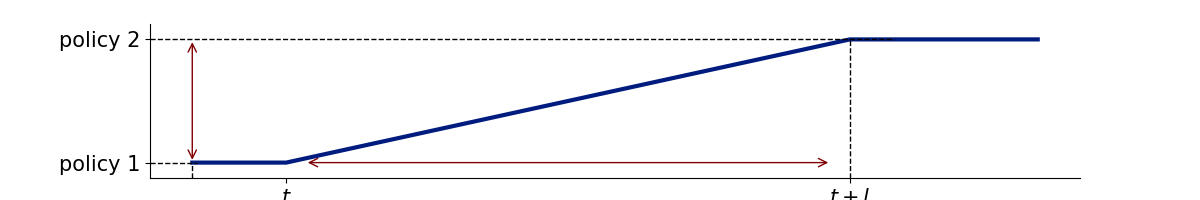

In [106]:
days = np.array([i for i in range(0, 10)])
policy = np.zeros(len(days))

t0 = 1
l = 7
policy_1 = 0.1
policy_2 = 0.9

for t in days:
    if t < t0:
        policy[t] = policy_1
    if t >= t0 and t < t0+l:
        policy[t] = policy_1 + (policy_2 - policy_1)/(l-t0)*(t-t0)
    if t >= t0+l:
        policy[t] = policy_2
    
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(days, policy)
ax.grid(False)
ax.set_xlabel('Days', size=ticklabelsize)
# ax.set_ylabel('Policy value', size=ticklabelsize)

ax.set_ylim([0, 1])
ax.axvline(0, 0, 0.1, linestyle='--', color='k', linewidth=1)
ax.axvline(7, 0, 0.9, linestyle='--', color='k', linewidth=1)
ax.axhline(0.1, xmin=0.0, xmax=0.05, linestyle='--', color='k', linewidth=1)
ax.axhline(0.9, xmin=0.0, xmax=0.8, linestyle='--', color='k', linewidth=1)
# ax.set_title('Effect of vaccine waning', size=ticklabelsize+2)

plt.yticks([0.1, 0.9], ["policy 1", "policy 2"])
plt.xticks([1, 7], ["$t$", "$t+l$"])

ax.annotate("", xy=(1.2, 0.1), xytext=(6.8, 0.1), arrowprops=dict(arrowstyle="<->", color='maroon'))
ax.annotate("", xy=(0, 0.1), xytext=(0, 0.9), arrowprops=dict(arrowstyle="<->", color='maroon'))
# ax.arrow(0.5, 0.1, 6, 0)

# _ = plt.xticks(rotation=0, size=ticklabelsize)

# ax.legend(['$E_{inf}(t)$', '$E_{susc}(t)$', '$E_{hosp}(t)$'], fontsize=ticklabelsize, ncol=3, loc='center', bbox_to_anchor=(0.22, 0.95))

# plt.savefig('social_intertia.png', dpi=400, bbox_inches='tight')